# k-Nearest Neighbor Algorithm
## Jade Gee
---
---
### Overview

The k-Nearest Neighbor algorithm is a supervised machine learning algorithm that is used to solve classification and regression problems. It relies on the input data to learn a function that outputs appropriate results when provided new unlabeled data. A classification problem takes discrete data to predict was a particular input will be categorized as. For example, if your are given the data: "the child likes carrots" and "the child does not like carrots". The information has no in between data, the result is either one or the other.

As such, the KNN algorithm uses the assumption that the input data is true enough to predict the category that the information falls under based on the input data's closest data points within proximity as shown below.

![KNN](knn.png)

For the purpose of this project, we will implement the KNN algorithm on the [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) using the Julia programming language to clasify the data and predict the species of flower based on the closest data points to the selected point that we are trying to predict.

To begin, we must add the following packages:

### Import Packages

The following packages are required for this notebook:
- [RDatasets documentation](https://github.com/JuliaStats/RDatasets.jl)
    + In order to access the iris data set that is available in the core of R.
- [Plots documentation](http://docs.juliaplots.org/latest/)
    + In order to visualize the data set using plots.
- [CSV documentation](https://juliadata.github.io/CSV.jl/latest/)
    + In order to read in .csv files.

In [1]:
using RDatasets
using Plots
using CSV+

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1278
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


---
---
### Gather Data

We will gather the data that we are going to be using for our k-Nearest Neighbors algorithm. As we will be using a subset of the Iris data set, we need to isolate the data that we will be using in our algorithm. Therefore, we will pull the data and store it in its respective variables: `x_data` and `y_data`.

In [40]:
# Import the data
iris = dataset("datasets", "iris")

# Stores the Sepal Length, Sepal Width, and Petal Length -- creates the feature set
x_data = [x for x in zip(iris.SepalLength[1:30], iris.SepalWidth[1:30], iris.PetalLength[1:30])]
for i = 51:80
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
end
for i = 101:130
    push!(x_data, (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i]))
end

# Stores the Species of the respective iris -- creates the Label 
y_data = [iris.Species[i] for i = 1:30]
for i = 51:80
    push!(y_data, iris.Species[i])
end
for i = 101:130
    push!(y_data, iris.Species[i])
end

We will create a scatter plot of the subset of the iris data that we are using in the k-Nearest Neighbors Algorithm.

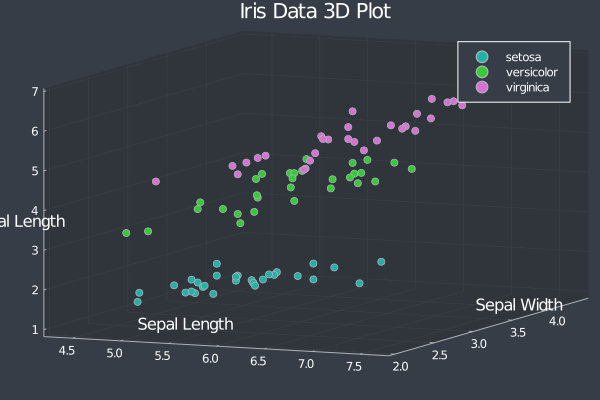

In [41]:
# Plot the data being used
theme(:dark)
scatter(xaxis = "Sepal Length",
    yaxis = "Sepal Width",
    zaxis = "Petal Length",
    title = "Iris Data 3D Plot")
scatter!(x_data[1:30], 
    label = "setosa", 
    color = "lightseagreen")
scatter!(x_data[31:60], 
    label = "versicolor", 
    color = "limegreen")
scatter!(x_data[61:90], 
    label = "virginica", 
    color = "orchid")

The above plot depicts the subset of the Iris data set that we will be using in this algorithm.

---
### Define the functions

We will need to create three functions for the implementation of this algorithm:

- a distance function
    + to calculate the distance between data points
- a KNN function
    + to implement the algorithm
- a neighbors function
    + to display and store the data points that are in closest proximity to our target point

In [42]:
"""
p1:  the first data point
p2:  the second data point

Calculates the distance between two data 
points in the feature set.

Returns:
The distance between the two data points.
"""
function distance(p1, p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i = 1:length(p1)]))
end

distance

In [43]:
"""
target:  the target data point
set:     data stored for x from the data set
labels:  the species for the data in the set
k:       the distance betwen the two analyzed data points

Stores the set, labels, and distance; then iterates through 
the set to verify that the target point is in the set.

Returns:
The distance array sorted by distance.
"""
function KNN(target, set, labels, k)
    distance_array = [(set[i], labels[i], distance(target, set[i])) 
        for i = 1:length(set) 
            if target != set[i]]
    
    sort!(distance_array, by = x -> x[3])
    return distance_array[1:k]
end   

KNN

In [129]:
# Create a function to look at the ith entry in Sepal Length, Sepal Width, and Petal Length

test_point(i) = (iris.SepalLength[i], iris.SepalWidth[i], iris.PetalLength[i])

# Create a function to display the neighbors of a test point
"""
i:  an index number within the set
k:  the distance between the data points

Identifies the target point, then displays the closest data
points to the target and stores both into separate arrays.

Returns:
The target point's nearest data points.
"""
function neighbors(index, set, labels, k)
    push!(target, test_point(index))
    println("")
    println("Target Point P = ", test_point(index))
    println("Target Label P = ", iris.Species[index])
    println("k = ", k)
    println("______________________________")
    
    test = KNN(test_point(index), set, labels, k)
    
    # Displays neighbors
    for i = 1:length(test)
        println("Point $i = ", test[i][1])
        println("Point Label = ", test[i][2])
        println("Distance = ", test[i][3])
        if i != length(test)
            println("")
        end
    end
    println("______________________________")
    println("")
    
    # Plot the Original Data and Overlay the Target Data Point 
    # and its nearest neighbors
    theme(:dark)

    # Original Data
    scatter(title = "Nearest Neighbors 3D Plot", 
            xaxis = "Sepal Length", 
            yaxis = "Sepal Width", 
            zaxis = "Petal Length")
    
    scatter!(x_data[1:30], 
            label = "Original Setosa Data", 
            color = "lime")
    
    scatter!(x_data[31:60], 
            label = "Original Versicolor Data", 
            color = "lightseagreen")
    
    scatter!(x_data[61:90], 
            label = "Original Virginica Data", 
            color = "purple")

    scatter!([test_point(index)], 
            label = "Test Point ",
            color = "gold", markershape = :star, markersize = 6.5) 
    
    for j = 1:length(test)
        plot!([test_point(index), test[j][1]], 
            label = false, color = "red", lw = 1.25)
    end    
    scatter!()
end

neighbors

### Testing the algorithm

Now, we will test the KNN algorithm that we have built.


Target Point P = (6.0, 2.2, 4.0)
Target Label P = versicolor
k = 10
______________________________
Point 1 = (5.5, 2.3, 4.0)
Point Label = versicolor
Distance = 0.5099019513592784

Point 2 = (5.6, 2.5, 3.9)
Point Label = versicolor
Distance = 0.5099019513592786

Point 3 = (6.2, 2.2, 4.5)
Point Label = versicolor
Distance = 0.5385164807134505

Point 4 = (5.8, 2.7, 4.1)
Point Label = versicolor
Distance = 0.5477225575051662

Point 5 = (6.1, 2.8, 4.0)
Point Label = versicolor
Distance = 0.6082762530298216

Point 6 = (5.7, 2.6, 3.5)
Point Label = versicolor
Distance = 0.7071067811865475

Point 7 = (5.9, 3.0, 4.2)
Point Label = versicolor
Distance = 0.8306623862918072

Point 8 = (5.7, 2.8, 4.5)
Point Label = versicolor
Distance = 0.8366600265340752

Point 9 = (6.0, 2.9, 4.5)
Point Label = versicolor
Distance = 0.8602325267042624

Point 10 = (6.4, 2.9, 4.3)
Point Label = versicolor
Distance = 0.8602325267042625
______________________________



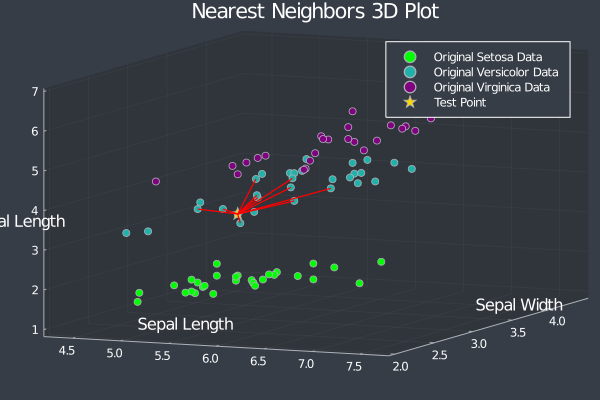

In [130]:
#Test Function
neighbors(63, x_data, y_data, 10)

As you can see from the above plot, this k-Nearest Neighbors algorithm successfully identified the data points within the closest proximity to our target point. We will now create a function that will predict the species of a target point.

In [131]:
"""
i:       an index number within the set
set:     data stored for x from the data set
labels:  the species for the data in the set
k:       the distance between the data points 

Predicts the species (label) of the test point.

Returns:
The label (species) of the data point.
"""
function predictor(i, set, labels, k)
    point = test_point(i)
    knn_array = KNN(point, set, labels, k)
    
    setosa_count = sum([1 for x in knn_array if x[2] == "setosa"])
    veriscolor_cnt = sum([1 for x in knn_array if x[2] == "versicolor"])
    virginica_cnt = sum([1 for x in knn_array if x[2] == "virginica"])
    
    count_array = [("setosa", setosa_count), ("versicolor", veriscolor_cnt), ("virginica", virginica_cnt)]
    sort!(count_array, by = x -> x[2])
    
    return count_array[end][1]
end

predictor

In [132]:
# Test the predictor function
predictor(63, x_data, y_data, 10)

"versicolor"

In [133]:
# Check the the predictor function test
iris.Species[63]

CategoricalValue{String,UInt8} "versicolor"

From the function, `predictor`, we are able to see that the data generated from the function `neighbors` matches up with the results from the function `predictor`. As such, we can conclude that the algorithm ran successfully. 

---
---

### Conclusion

For additional information regarding k-Nearest Neighbor Algorithm, as well as deeper knowledge, please see the following links:

- [KNN Image](https://medium.com/@sonish.sivarajkumar/k-nearest-neighbours-knn-algorithm-9900c1427726)
    + The image shown at the top.

- [K-nearest Negihbor on Scholarpedia](http://www.scholarpedia.org/article/K-nearest_neighbor)

- [KNN Algorithm on Wiki](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm#Algorithm)

- [ML Basics with the KNN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

---
---